In [1]:
# Atividade 8
# Utilizando a base de dados USA_Housing.csv, realize a analise dos atributos da base de dados,
# a remoção dos atributos dispensáveis e uma regressão linear apresentando a Raiz do erro médio Quadrático,
# o Erro Médio Quadrático e o Erro Médio Absoluto.

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [9]:
df = pd.read_csv('bases/USA_Housing.csv')

In [4]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [17]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


<Axes: >

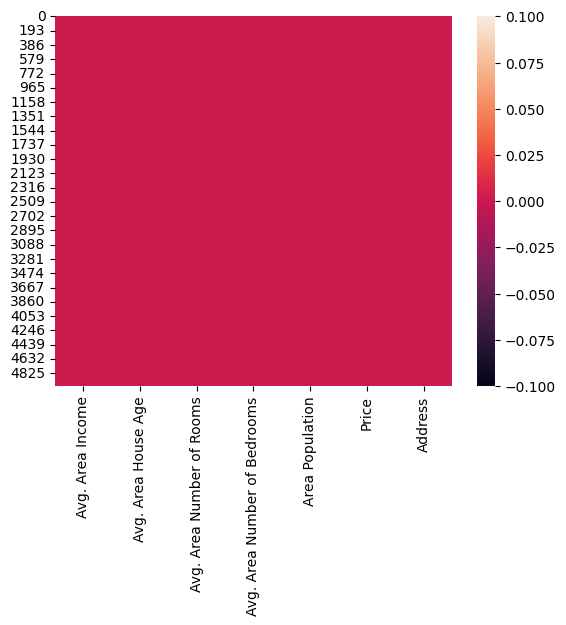

In [5]:
sns.heatmap(df.isnull())

In [7]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [11]:
df_2 = df.drop(columns='Address')
df_2

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


<Axes: xlabel='Price', ylabel='Count'>

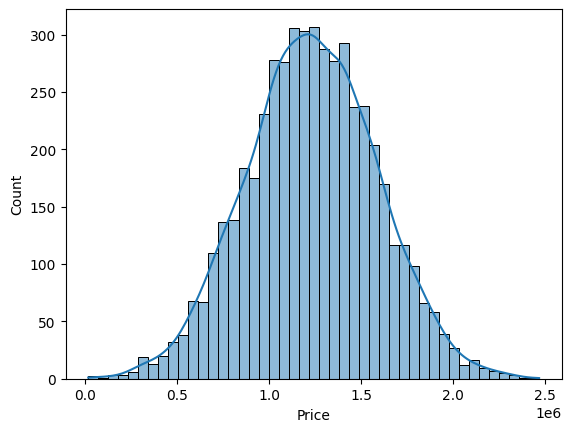

In [13]:
sns.histplot(df_2['Price'], kde=True)

<Axes: xlabel='Avg. Area Income', ylabel='Count'>

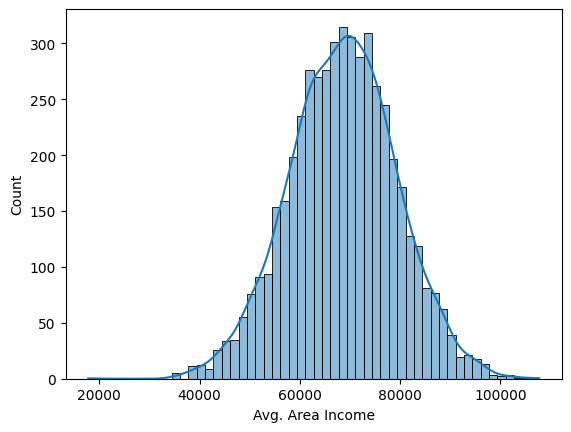

In [14]:
sns.histplot(df_2['Avg. Area Income'], kde=True)

<Axes: xlabel='Avg. Area Number of Rooms', ylabel='Count'>

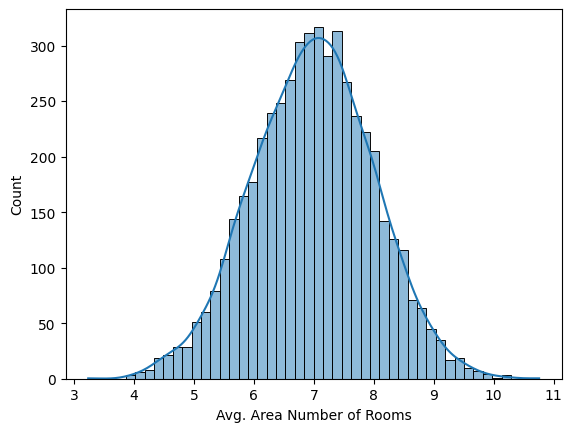

In [24]:
sns.histplot(df_2['Avg. Area Number of Rooms'], kde=True)

<Axes: >

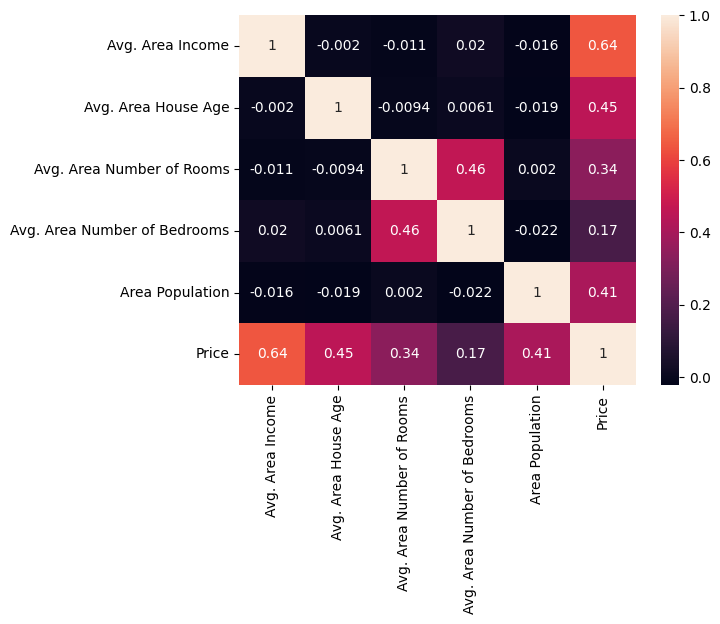

In [22]:
sns.heatmap(df_2.corr(), annot=True)

In [12]:
df_3 = df_2.drop(columns='Avg. Area Number of Bedrooms')
df_3

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Price
0,79545.458574,5.682861,7.009188,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,26354.109472,6.309435e+05
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,42625.620156,1.198657e+06


<Axes: >

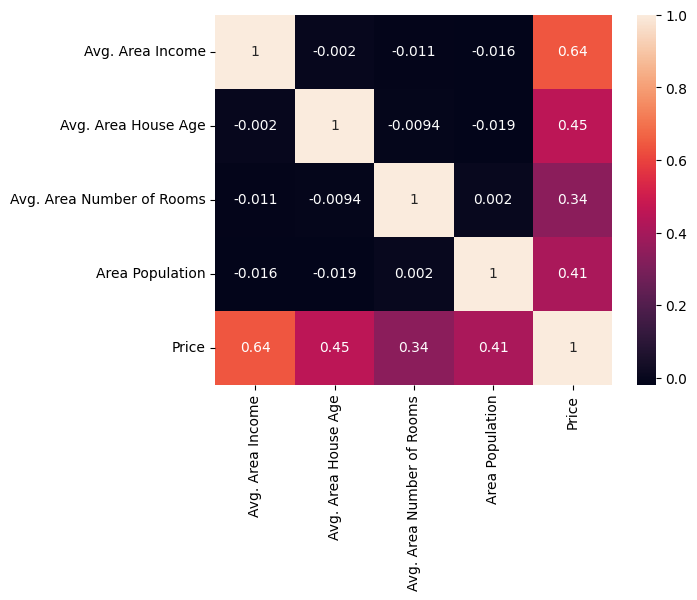

In [28]:
sns.heatmap(df_3.corr(), annot=True)

<Axes: xlabel='Avg. Area House Age'>

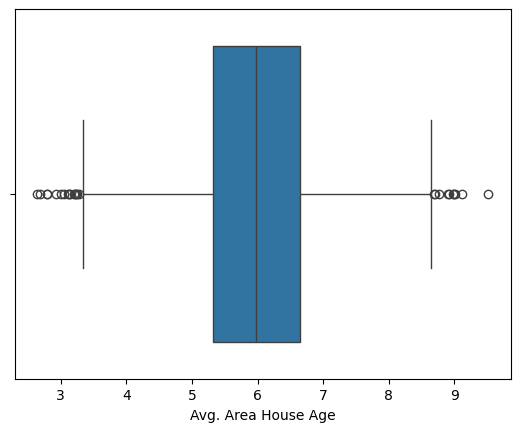

In [35]:
sns.boxplot(x=df_3['Price'], data=df_3)

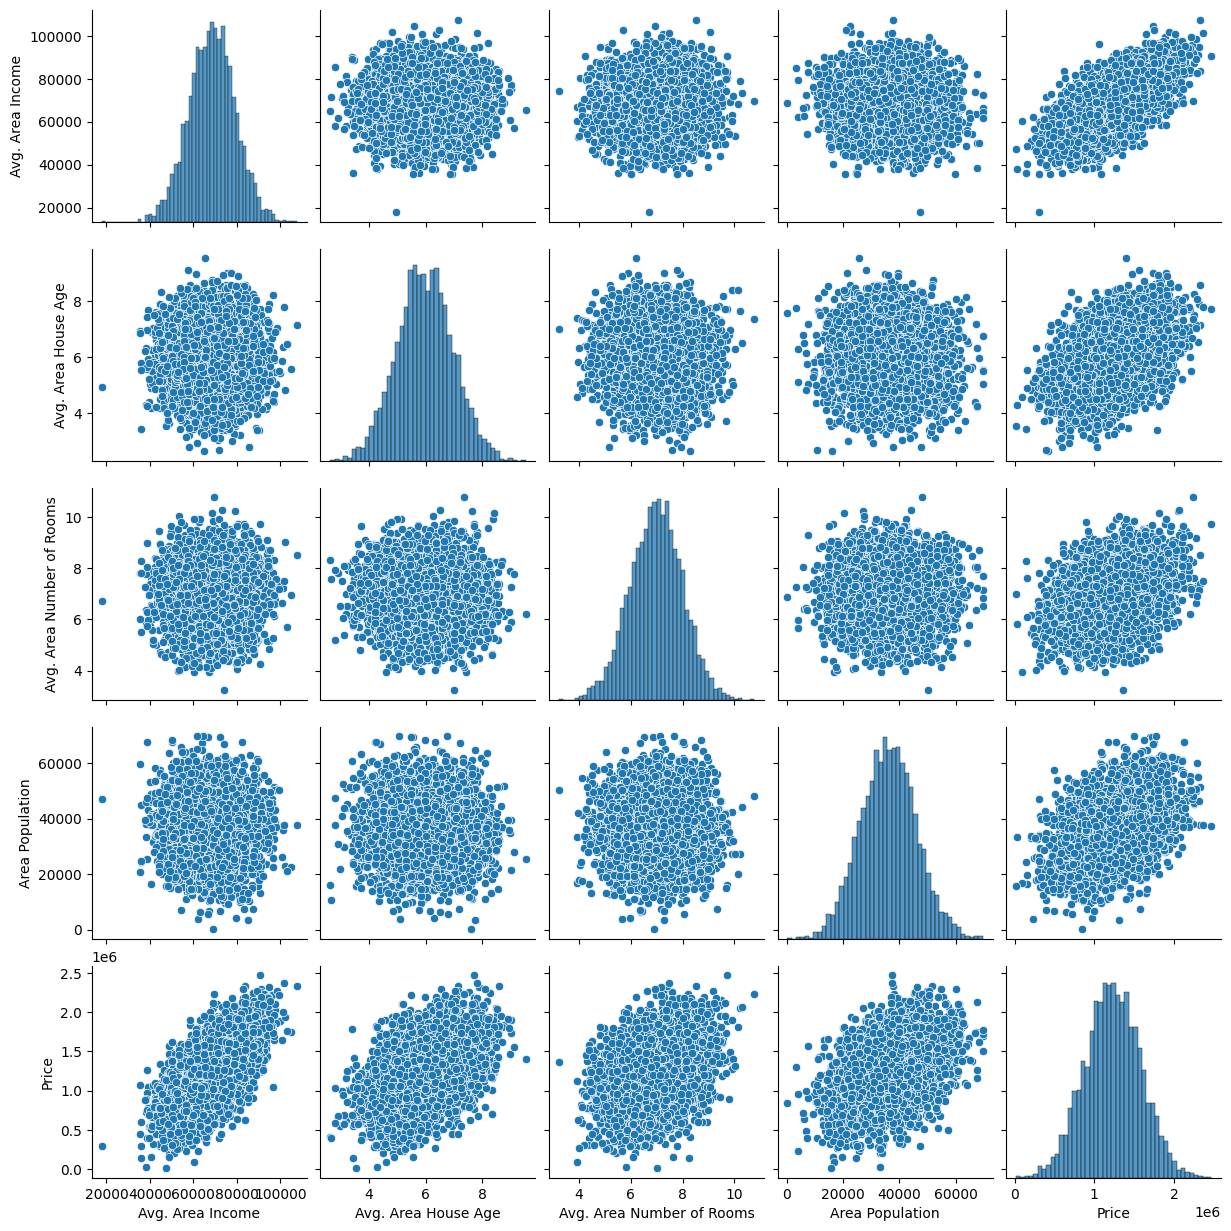

In [50]:
sns.pairplot(df_3)

<Axes: ylabel='Avg. Area Income'>

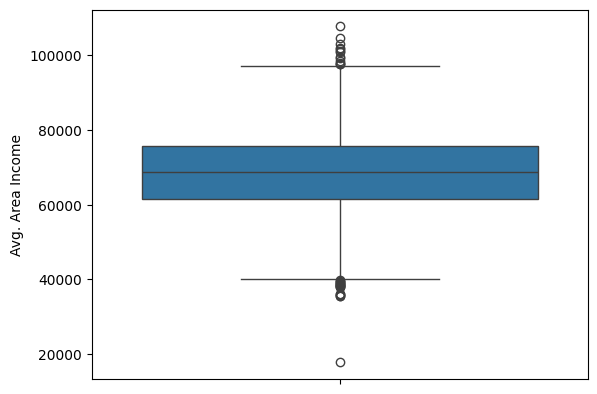

In [25]:
sns.boxplot(df_3['Avg. Area Income'])

In [28]:
def limpar_df(column, df):
    q1, q3 = np.percentile(df[column], [25, 75])
    
    #Intervalo Interquartil
    irq = q3 - q1
    
    limite_inferior = q1 - (1.5 * irq)
    limite_superior = q3 + (1.5 * irq)
    
    df_limpo = df[
        (df[column] >= limite_inferior) 
    &   (df[column] <= limite_superior)
    ]

    return df_limpo

In [39]:
# Limpando a coluna "Avg. Area Income"

In [39]:
df_limpo = limpar_df('Avg. Area Income', df_3)

<Axes: ylabel='Avg. Area Income'>

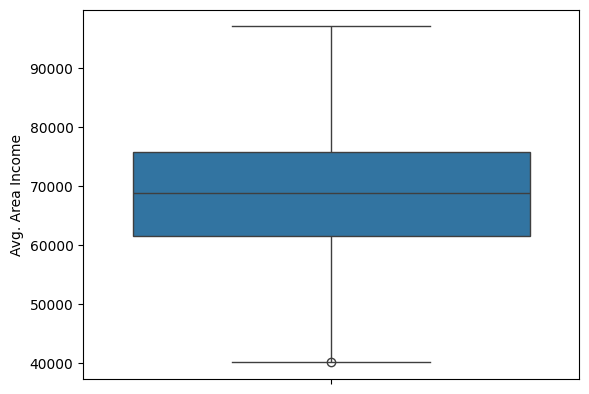

In [40]:
sns.boxplot(df_limpo['Avg. Area Income'])

In [ ]:
# Limpando a coluna "Price"

<Axes: ylabel='Price'>

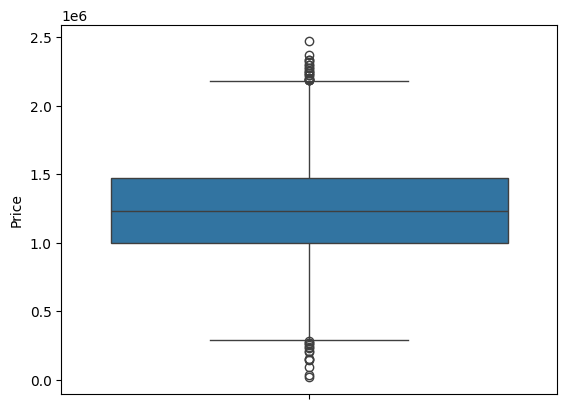

In [41]:
sns.boxplot(df_3['Price'])

In [42]:
df_limpo = limpar_df('Price', df_limpo)

<Axes: ylabel='Price'>

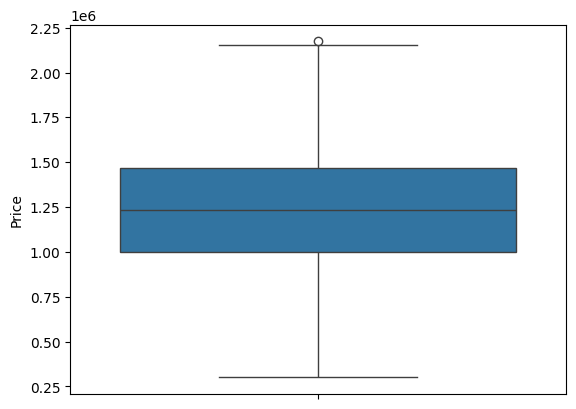

In [43]:
sns.boxplot(df_limpo['Price'])

In [ ]:
# Limpando a coluna "Avg. Area House Age"

<Axes: ylabel='Avg. Area House Age'>

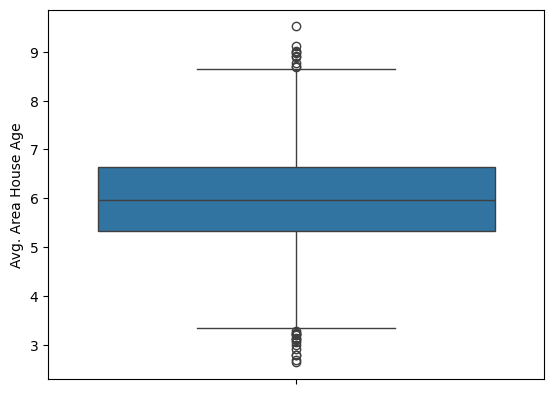

In [44]:
sns.boxplot(df_3['Avg. Area House Age'])

In [45]:
df_limpo = limpar_df('Avg. Area House Age', df_limpo)

<Axes: ylabel='Avg. Area House Age'>

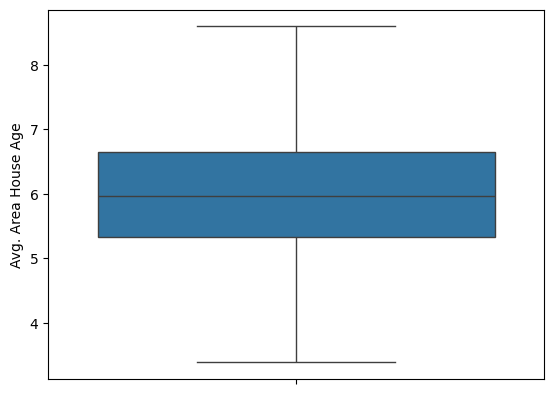

In [46]:
sns.boxplot(df_limpo['Avg. Area House Age'])

In [ ]:
# Limpando a coluna "Avg. Area Number of Rooms"

<Axes: ylabel='Avg. Area Number of Rooms'>

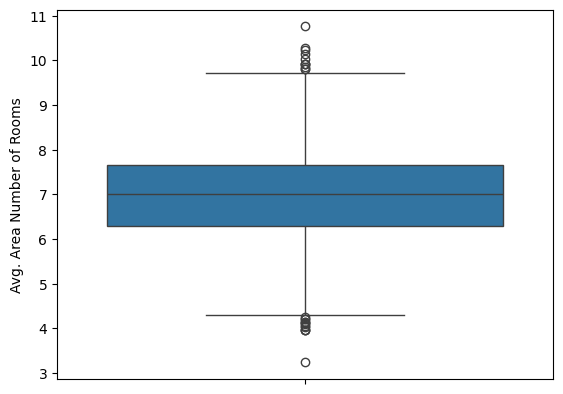

In [48]:
sns.boxplot(df_3['Avg. Area Number of Rooms'])

In [50]:
df_limpo = limpar_df('Avg. Area Number of Rooms', df_limpo)

<Axes: ylabel='Avg. Area Number of Rooms'>

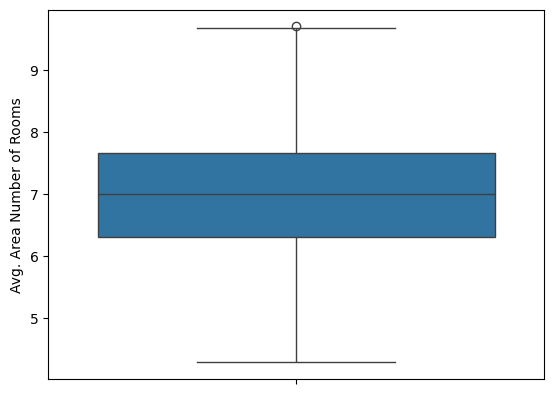

In [51]:
sns.boxplot(df_limpo['Avg. Area Number of Rooms'])

In [ ]:
# Limpando a coluna "Area Population"

<Axes: ylabel='Area Population'>

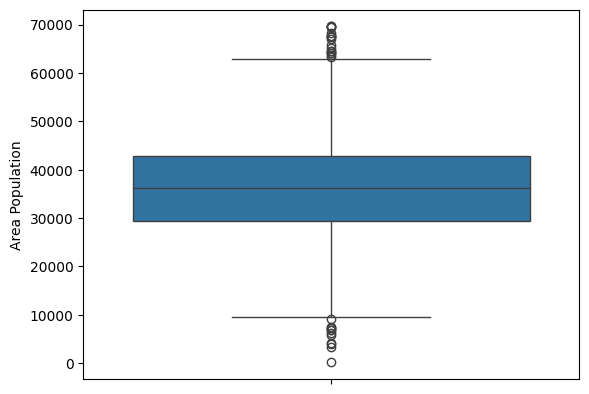

In [52]:
sns.boxplot(df_3['Area Population'])

In [53]:
df_limpo = limpar_df('Area Population', df_limpo)

<Axes: ylabel='Area Population'>

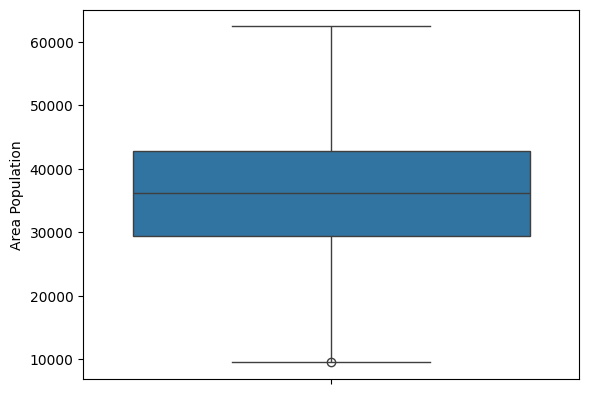

In [54]:
sns.boxplot(df_limpo['Area Population'])

In [58]:
df_limpo.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Price
count,4855.000000,4855.000000,4855.000000,4855.000000,4.855000e+03
mean,68617.875695,5.977106,6.985642,36122.241110,1.231727e+06
std,10288.128056,0.963907,0.983743,9622.978944,3.374215e+05
min,40141.566477,3.386004,4.290194,9487.921585,3.004641e+05
25%,61596.931717,5.332701,6.304033,29459.613237,1.003121e+06
50%,68848.196682,5.970953,7.002164,36147.828571,1.232209e+06
75%,75699.290380,6.641031,7.660127,42763.519903,1.464820e+06
max,97112.361252,8.598383,9.699773,62449.973848,2.173809e+06


<Axes: >

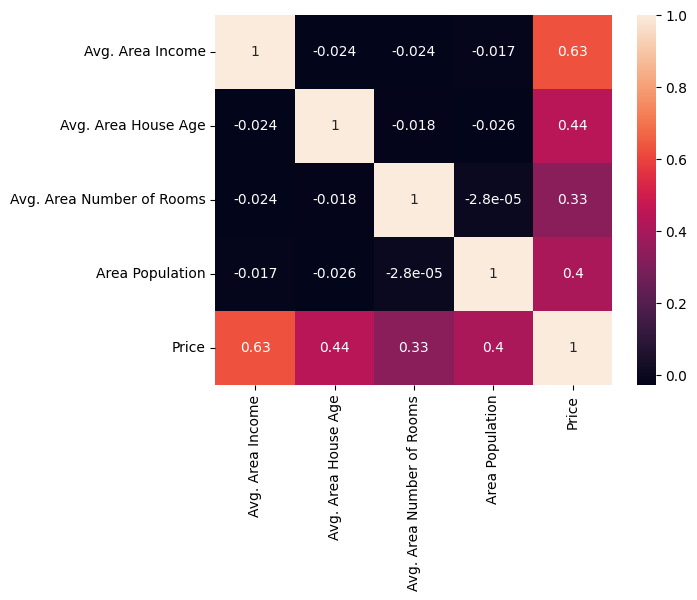

In [57]:
sns.heatmap(df_limpo.corr(), annot=True)

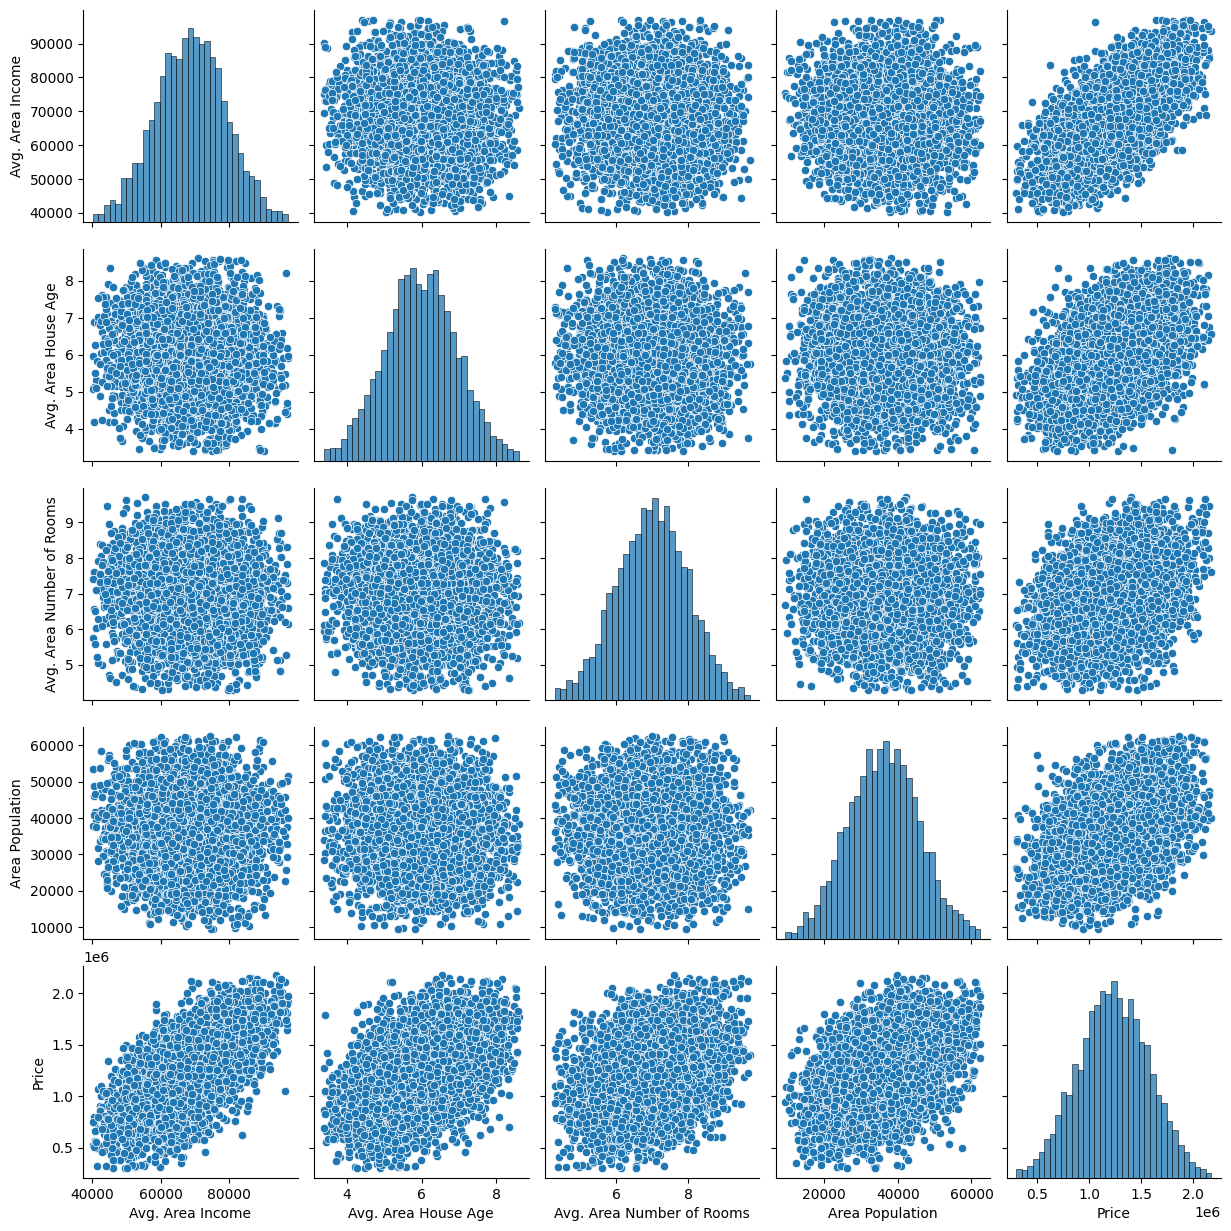

In [67]:
sns.pairplot(df_limpo)

<Axes: xlabel='Avg. Area Income', ylabel='Price'>

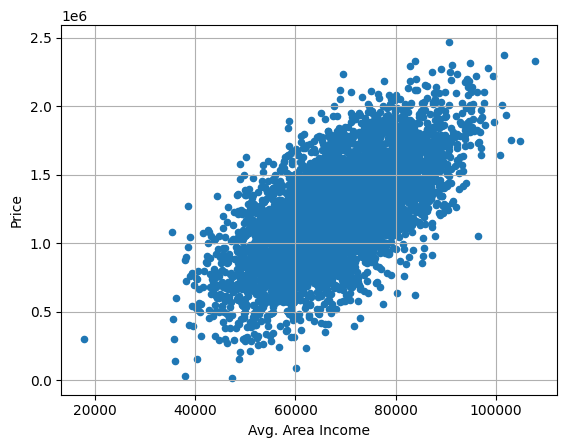

In [70]:
df_3.plot(kind='scatter', grid=True, x="Avg. Area Income", y="Price")

<Axes: xlabel='Avg. Area Income', ylabel='Price'>

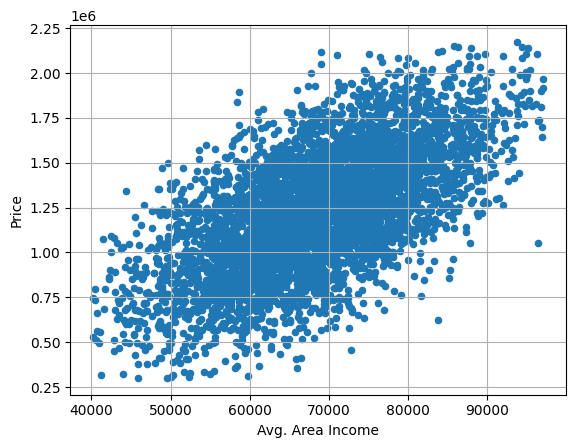

In [69]:
df_limpo.plot(kind='scatter', grid=True, x="Avg. Area Income", y="Price")

In [101]:
#!pip install scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
#!pip install mlxtend
from mlxtend.evaluate import bias_variance_decomp

In [88]:
data = df_limpo.values
data

array([[7.95454586e+04, 5.68286132e+00, 7.00918814e+00, 2.30868005e+04,
        1.05903356e+06],
       [7.92486425e+04, 6.00289981e+00, 6.73082102e+00, 4.01730722e+04,
        1.50589091e+06],
       [6.12870672e+04, 5.86588984e+00, 8.51272743e+00, 3.68821594e+04,
        1.05898799e+06],
       ...,
       [6.33906869e+04, 7.25059061e+00, 4.80508098e+00, 3.32661455e+04,
        1.03072958e+06],
       [6.80013312e+04, 5.53438842e+00, 7.13014386e+00, 4.26256202e+04,
        1.19865687e+06],
       [6.55105818e+04, 5.99230531e+00, 6.79233610e+00, 4.65012838e+04,
        1.29895048e+06]], shape=(4855, 5))

In [89]:
x, y = data[:, :-1], data[:, -1]

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.33, random_state=1)

In [97]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [98]:
y_pred = model.predict(x_test)

In [99]:
mse, bias, var = bias_variance_decomp(
    model, x_train, y_train, x_test, y_test, loss='mse', num_rounds=200, random_seed=1
)

In [102]:
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

In [103]:
print("MSE: {:.3f}".format(mse))
print("RMSE: {:.3f}".format(rmse))
print("MAE: {:.3f}".format(mae))

MSE: 10475773206.121
RMSE: 102351.225
MAE: 82055.737


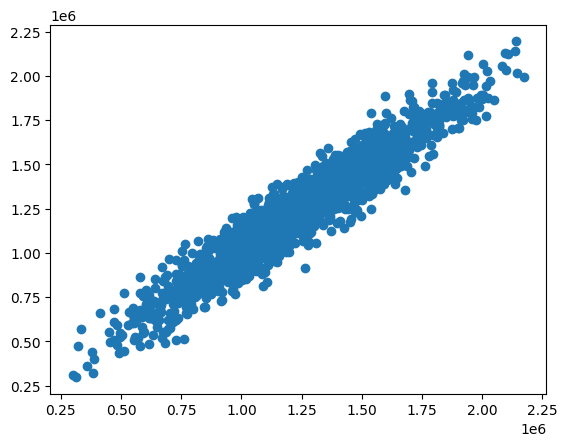

In [105]:
plt.scatter(y_test, y_pred)